<a href="https://colab.research.google.com/github/sharmapratik88/LearningAI/blob/main/NLP_HuggingFace_LLMs/API_%26_LangChain_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Setting the current working directory
import os; os.chdir('drive/My Drive/Colab Notebooks/')

In [3]:
!pip install -q -U langchain
!pip install -q openai
!pip install -q -U langchain-openai
!pip install -q -U langchain_google_genai

In [4]:
from google.colab import userdata
from pprint import pprint

In [5]:
# Assigning the Hugging Face token from user data to the API_TOKEN variable
HUGGINGFACE_TOKEN = userdata.get('HUGGINGFACE_TOKEN')

# Assigning the OpenAI API key from user data to the OPENAI_API variable
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Assigning the Google API key from user data to the GEMINI_API variable
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

## Without Langchain

In [6]:
from openai import OpenAI
import google.generativeai as genai

import requests
import pandas as pd

from IPython.display import Image

### Exploring HuggingFace API

In [7]:
# Setting up the headers with the Authorization token
headers = {'Authorization': f'Bearer {HUGGINGFACE_TOKEN}'}

# Function to query the API with the provided payload and API URL
def query(payload, API_URL):
  response = requests.post(API_URL, headers=headers, json=payload)
  print(response)
  return response.json()

# Defining the question payload
question = {
	'inputs': 'Capital of India?',
}

# Defining the API URL
API_URL = 'https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta'

# Calling the query function with the question and API URL
output = query(question, API_URL=API_URL)

# Generated output
print('Output\n\n')
pprint(output[0]['generated_text'])

<Response [200]>
Output


('Capital of India?\n'
 'The capital of India is New Delhi. This city is spread over 1,483 sq km. '
 "There is a saying 'Delhi' has two meanings. Firstly, it means a city founded "
 'by Raja Dhili (Delhi). It was also called Indraprastha, the capital of the '
 "Pandavas in the ancient epic, Mahabharata. The second meaning is, 'Delhi' is "
 "derived from the word 'Dhilli' which")


### Exploring the OpenAI API

In [8]:
# Initiating open AI client
client=OpenAI(api_key=OPENAI_API_KEY)

# Retrieving a list of models from the client
models = client.models.list().data

print('List of models')
display(models)

List of models


[Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'),
 Model(id='text-embedding-3-large', created=1705953180, object='model', owned_by='system'),
 Model(id='gpt-4-vision-preview', created=1698894917, object='model', owned_by='system'),
 Model(id='gpt-4-turbo-preview', created=1706037777, object='model', owned_by='system'),
 Model(id='gpt-3.5-turbo-0613', created=1686587434, object='model', owned_by='openai'),
 Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'),
 Model(id='gpt-3.5-turbo-instruct-0914', created=1694122472, object='model', owned_by='system'),
 Model(id='whisper-1', created=1677532384, object='model', owned_by='openai-internal'),
 Model(id='tts-1-hd-1106', created=1699053533, object='model', owned_by='system'),
 Model(id='tts-1-hd', created=1699046015, object='model', owned_by='system'),
 Model(id='babbage-002', created=1692634615, object='model', owned_by='system'),
 Model(id='text-embedding-3-small', created=1705948997, ob

In [9]:
# Creating a chat completion request with the specified model and messages
response = client.chat.completions.create(
    model='gpt-3.5-turbo',
    messages=[
        {'role': 'system',
         'content': 'you are a funny assistant who describe everything in funniest way'},
        {'role': 'user',
         'content': 'compose a poem for the Indian people'}
    ]
)

print(f'Response:\n\n{response.choices[0].message.content}')

Response:

In a land of colors bright and bold,
Where spices dance and stories are told,
The people of India stand proud and tall,
Their spirit never ceasing to enthral.

From the bustling streets of Mumbai's throng,
To the temples of Varanasi's ancient song,
Each person carries a spark unique,
A charm and wit that never will eke.

With smiles as warm as the Indian sun,
They welcome all, never on the run,
Their laughter echoes through the air,
A melody of love, beyond compare.

So here's to the people of India, so grand,
A tapestry of culture, rich and grand,
May their spirit forever shine bright,
In this colorful world, day and night.


### Gemini API

In [10]:
genai.configure(api_key=GOOGLE_API_KEY)
for models in genai.list_models():
  print(models)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko',
      description='Obtain a distributed representatio

In [11]:
# Looping through the available models in genai
for models in genai.list_models():
    if 'generateContent' in models.supported_generation_methods:
        print(models.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [12]:
# Creating a GenerativeModel object with the specified model 'gemini-1.0-pro'
model_text = genai.GenerativeModel('gemini-1.0-pro')

# Generating content using the model
response = model_text.generate_content('Capital of India? Write a short poem')

# Printing the generated text from the response
print(response.text)

**New Delhi**

In heart of India's land, a city grand,
New Delhi, capital, where dreams expand.

Modern towers pierce the azure sky,
A symphony of steel that reaches high.

Monuments of history, a timeless tale,
From Red Fort's walls to Qutab's ethereal veil.

Gardens bloom with vibrant hues and grace,
A tapestry of colors, nature's embrace.

People from every corner, diverse and proud,
A vibrant tapestry, a harmonious crowd.

New Delhi, India's heart, a beacon bright,
Symbol of progress, a shining light.


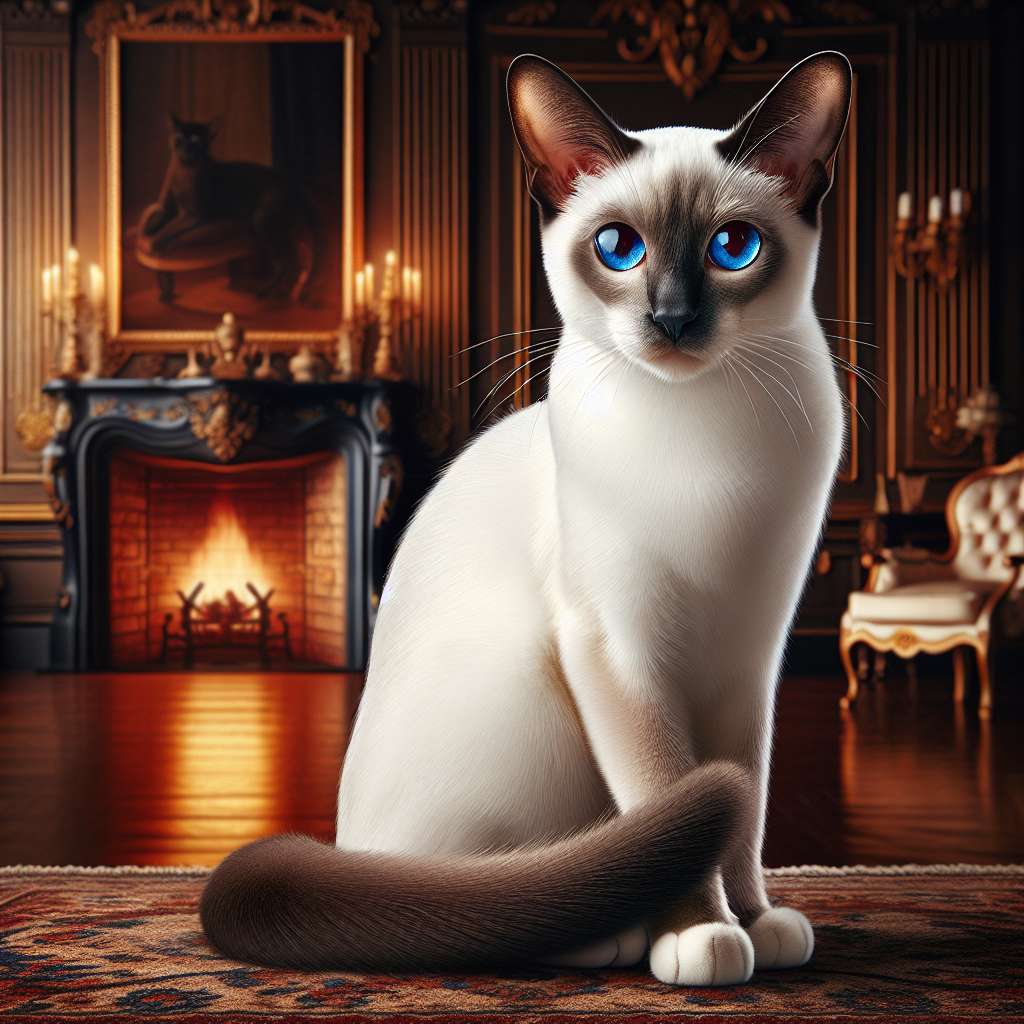

In [13]:
# Image generation
response = client.images.generate(
    model ='dall-e-3',
    prompt = 'a white siamese cat',
    quality = 'standard',
    n = 1,
)
image_url = response.data[0].url
content = requests.get(image_url).content
Image(content)

## With Langchain

In [14]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

from langchain_openai import OpenAI

from langchain import HuggingFaceHub

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

### Langchain and OpenAI

In [15]:
llm = OpenAI(openai_api_key = OPENAI_API_KEY)

template = """Question: {question}
Answer: Let's think step by step."""

prompt = PromptTemplate.from_template(template)
llm_chain = LLMChain(prompt=prompt, llm=llm)

question = 'What NFL team won the Super Bowl in the year Justin Beiber was born?'
pprint(llm_chain.run(question))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


(' Justin Bieber was born on March 1, 1994. The Super Bowl in 1994 was Super '
 'Bowl XXVIII, played on January 30, 1994. The Dallas Cowboys won this Super '
 'Bowl with a score of 30-13 against the Buffalo Bills. So, the Dallas Cowboys '
 'are the team that won the Super Bowl in the year Justin Bieber was born.')


### Langchain and HuggingFace Hub

In [16]:
gemma = HuggingFaceHub(repo_id = 'google/gemma-7b-it',
                       huggingfacehub_api_token=HUGGINGFACE_TOKEN)

template = """Question: {question}
Length of response: 10 words
Task: Let's think step by step and \
limit your response within the length provided.
Answer: """

prompt = PromptTemplate.from_template(template)
llm_chain = LLMChain(prompt=prompt, llm=gemma)

question = 'Write about what is Generative AI?'
response = llm_chain.run(question)
pprint(response)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.huggingface_hub.HuggingFaceHub` was deprecated in langchain-community 0.0.21 and will be removed in 0.2.0. Use HuggingFaceEndpoint instead.
  warn_deprecated(


('Question: Write about what is Generative AI?\n'
 'Length of response: 10 words\n'
 "Task: Let's think step by step and limit your response within the length "
 'provided.\n'
 'Answer: \n'
 'Generative AI is a type of artificial intelligence that can generate new '
 'content, such as text, images, and code.')


In [17]:
mistral = HuggingFaceHub(repo_id = 'mistralai/Mistral-7B-Instruct-v0.2',
                       huggingfacehub_api_token=HUGGINGFACE_TOKEN)


template = """Question: {question}
Length of response: 10 words
Task: Let's think step by step and translate the {question} to Hindi.
Answer: """

prompt = PromptTemplate.from_template(template)
llm_chain = LLMChain(prompt=prompt, llm=mistral)

question = 'My name is Pratik'
response = llm_chain.run(question)
pprint(response)

('Question: My name is Pratik\n'
 'Length of response: 10 words\n'
 "Task: Let's think step by step and translate the My name is Pratik to "
 'Hindi.\n'
 'Answer: मेरा नाम प्रतिक (Mera naam Pratik)')


In [18]:
mistral = HuggingFaceHub(repo_id = 'Piyush41/Sanskrit-kannada',
                       huggingfacehub_api_token=HUGGINGFACE_TOKEN)


template = """Question: {question}
Answer: """

prompt = PromptTemplate.from_template(template)
llm_chain = LLMChain(prompt=prompt, llm=mistral)

question = 'My name is Pratik'
response = llm_chain.run(question)
pprint(response)

'प्रश्नॆ : नन्न हॆसरु Pratik Answer | प्रश्नॆ : नन्न हॆसरु अखिल'


### Langchain and Google Gen AI

In [19]:
google = ChatGoogleGenerativeAI(model='gemini-pro',
                                google_api_key=GOOGLE_API_KEY)

template = """Question: {question}
Task: Let's think step by step.
Answer: """

prompt = PromptTemplate.from_template(template)
llm_chain = LLMChain(prompt=prompt, llm=google)

question = 'Write a ballad about LangChain'
response = llm_chain.run(question)
pprint(response)

('In a realm of code, where knowledge flows,\n'
 'LangChain emerged, a beacon rose.\n'
 'A mighty model, wise and grand,\n'
 'A language weaver, at our command.\n'
 '\n'
 'From depths of data, it weaves with grace,\n'
 'Connecting words, a seamless embrace.\n'
 'Through vast text oceans, it navigates,\n'
 "Guiding us towards knowledge's gates.\n"
 '\n'
 'With every query, it responds with ease,\n'
 'A symphony of words, a gentle breeze.\n'
 'It comprehends, it generates,\n'
 'A linguistic maestro, it elevates.\n'
 '\n'
 'Like a skilled scribe, it paints with care,\n'
 'Creating content beyond compare.\n'
 'From summaries to stories untold,\n'
 "LangChain's magic, pure gold.\n"
 '\n'
 'In realms of research, it shines bright,\n'
 'Assisting scholars, day and night.\n'
 'It mines for insights, hidden deep,\n'
 'Unveiling secrets, secrets to keep.\n'
 '\n'
 'For businesses, it lends its might,\n'
 'Generating text, day and night.\n'
 'From marketing campaigns to customer care,\n'
 "LangCh

In [20]:
template = """Question: {question}
Task: Let's think step by step and limit response within 20 words.
Answer: """

prompt = PromptTemplate.from_template(template)
llm_chain = LLMChain(prompt=prompt, llm=google)

question = 'Write a ballad about LangChain'
response = llm_chain.run(question)
pprint(response)

'In realms of code, a tale unfolds,\nLangChain, a bard, with stories untold.'


In [21]:
# Image Generation
llm = ChatGoogleGenerativeAI(model='gemini-pro-vision',
                             google_api_key=GOOGLE_API_KEY)

message = HumanMessage(
    content=[
        {
            'type': 'text',
            'text': "What's in this image?",
        },
        {'type': 'image_url', 'image_url': image_url},
    ]
)
llm.invoke([message])

AIMessage(content=' This is an image of a Siamese cat sitting on a rug in front of a fireplace. There is a painting of a cat above the fireplace. There is a chair to the right of the fireplace. The room is decorated in a classic style.')